## Setup

In [92]:
# Set up parameters, image paths and category list
%matplotlib notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2


import cv2
import numpy as np
import os.path as osp
import pickle
from random import shuffle
import matplotlib.pyplot as plt
from PA4_utils import *
import Bag_of_Features_code as bfc


# This is the list of categories / directories to use. The categories are
# somewhat sorted by similarity so that the confusion matrix looks more
# structured (indoor and then urban and then rural).
categories = ['airplanes','butterfly','car_side','grand_piano', 'helicopter', 'Motorbikes',
              'sunflower','umbrella'];
# This list of shortened category names is used later for visualization
abbr_categories = ['Apl', 'Bfy', 'Car', 'Pno', 'Hel', 'Mbk', 'Sfl', 'Umb'];

# Number of training examples per category to use. Max is 100. 
num_train_per_cat = 100
# This function returns lists containing the file path for each train
# and test image, as well as lists with the label of each train and
# test image. By default all four of these lists will have 800 elements
# where each element is a string.
data_path = osp.join('/home/anirban/anirban/Lectures/Computer Vision/Assignment 4/Assignment4/CV_Programming_Assignment4/', 'data')
train_image_paths, test_image_paths, train_labels, test_labels = get_image_paths(data_path,
                                                                                 categories,
                                                                                num_train_per_cat);
print("Number of train images",len(train_image_paths),".")
print("Number of test images",len(test_image_paths),".")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Number of train images 520 .
Number of test images 80 .


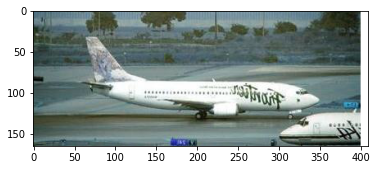

In [4]:
import cyvlfeat as vlfeat
image=cv2.imread(train_image_paths[0])
plt.imshow(image)

In [7]:
gray_image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
frames,descriptors=c=vlfeat.sift.dsift(gray_image,3,5)

In [8]:
frames

array([[  7.5,   7.5],
       [  7.5,  10.5],
       [  7.5,  13.5],
       ...,
       [154.5, 394.5],
       [154.5, 397.5],
       [154.5, 400.5]], dtype=float32)

In [9]:
descriptors

array([[ 7,  4,  0, ..., 25, 14, 67],
       [23,  8,  0, ..., 13, 13, 53],
       [38,  9,  0, ..., 19, 13, 32],
       ...,
       [ 9, 23, 36, ...,  0,  2,  4],
       [ 7, 43, 57, ...,  0,  0,  0],
       [23, 31, 52, ...,  0,  0,  0]], dtype=uint8)

## Bag of SIFT features with Nearest Neighbor classifier

### Represent each image with the Bag of SIFT feature

To create a new vocabulary, make sure `vocab_filename` is different than the old vocabulary, or delete the old one.

In [2]:
print('Using the BAG-OF-SIFT representation for images')

vocab_filename = '/home/anirban/anirban/Lectures/Computer Vision/Assignment 4/Assignment4/CV_Programming_Assignment4/'+'vocab.pkl'
if not osp.isfile(vocab_filename):
    # Construct the vocabulary
    print('No existing visual word vocabulary found. Computing one from training images')
    vocab_size = 200  # Larger values will work better (to a point) but be slower to compute
    vocab=bfc.build_vocabulary(train_image_paths, vocab_size)
    with open(vocab_filename, 'wb') as f:
        pickle.dump(vocab, f)
        print('{:s} saved'.format(vocab_filename))



Using the BAG-OF-SIFT representation for images


In [93]:
train_image_feats = bfc.get_bags_of_sifts(train_image_paths, vocab_filename,False)
test_image_feats = bfc.get_bags_of_sifts(test_image_paths, vocab_filename,False)

### Classify each test image by training and using the Nearest Neighbor classifier

#### k=1

In [129]:
print('Using NEAREST NEIGHBOR classifier to predict test set categories')
predicted_categories = bfc.nearest_neighbor_classify(train_image_feats, train_labels, test_image_feats,1)

Using NEAREST NEIGHBOR classifier to predict test set categories


###  Build a confusion matrix and score the recognition system

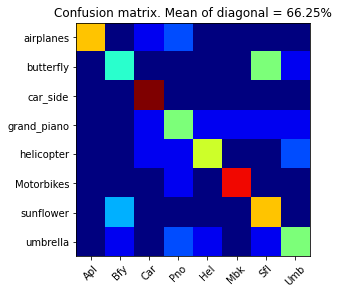

In [130]:
show_results(train_image_paths, test_image_paths, train_labels, test_labels, categories, abbr_categories,
             predicted_categories)

#### k=7

In [66]:
print('Using NEAREST NEIGHBOR classifier to predict test set categories')
predicted_categories = bfc.nearest_neighbor_classify(train_image_feats, train_labels, test_image_feats,7)

Using NEAREST NEIGHBOR classifier to predict test set categories


###  Build a confusion matrix and score the recognition system

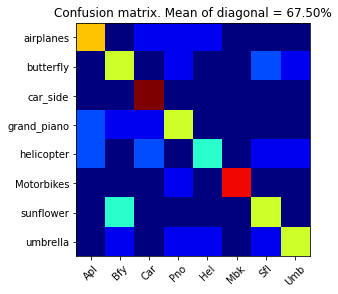

In [67]:
show_results(train_image_paths, test_image_paths, train_labels, test_labels, categories, abbr_categories,
             predicted_categories)

#### k=1 ,chi2

In [94]:
print('Using NEAREST NEIGHBOR classifier to predict test set categories')
predicted_categories = bfc.nearest_neighbor_classify(train_image_feats, train_labels, test_image_feats,1,'chi2')

Using NEAREST NEIGHBOR classifier to predict test set categories


###  Build a confusion matrix and score the recognition system

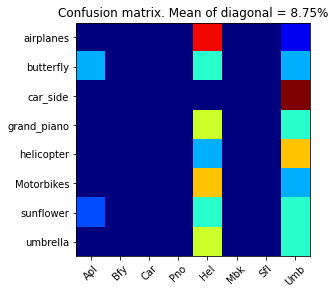

In [95]:
show_results(train_image_paths, test_image_paths, train_labels, test_labels, categories, abbr_categories,
             predicted_categories)

#### k=7, chi2

In [96]:
print('Using NEAREST NEIGHBOR classifier to predict test set categories')
predicted_categories = bfc.nearest_neighbor_classify(train_image_feats, train_labels, test_image_feats,7,'chi2')

Using NEAREST NEIGHBOR classifier to predict test set categories


###  Build a confusion matrix and score the recognition system

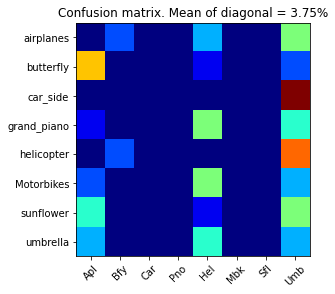

In [97]:
show_results(train_image_paths, test_image_paths, train_labels, test_labels, categories, abbr_categories,
             predicted_categories)

## Bag of SIFT features and SVM classifier
We will reuse the bag of SIFT features from before.

The difference is that this time we will classify them with a support vector machine (SVM).

### Classify each test image by training and using the SVM classifiers

### lambda=50

In [103]:
print('Using SVM classifier to predict test set categories')
predicted_categories = bfc.svm_classify(train_image_feats, train_labels, test_image_feats)

Using SVM classifier to predict test set categories


/home/anirban/anaconda3/envs/condapy36/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


###  Build a confusion matrix and score the recognition system

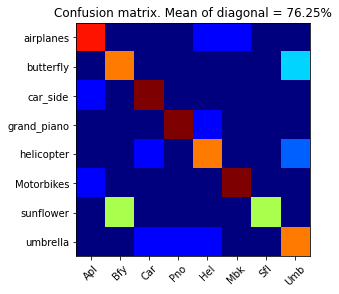

In [104]:
show_results(train_image_paths, test_image_paths, train_labels, test_labels, categories, abbr_categories,
             predicted_categories)

### lambda=70

In [33]:
print('Using SVM classifier to predict test set categories')
predicted_categories = bfc.svm_classify(train_image_feats, train_labels, test_image_feats)

Using SVM classifier to predict test set categories


/home/anirban/anaconda3/envs/condapy36/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


###  Build a confusion matrix and score the recognition system

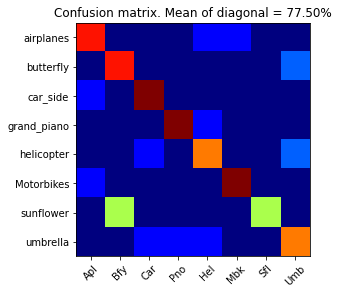

In [34]:
show_results(train_image_paths, test_image_paths, train_labels, test_labels, categories, abbr_categories,
             predicted_categories)

### lambda=96


In [59]:
print('Using SVM classifier to predict test set categories')
predicted_categories = bfc.svm_classify(train_image_feats, train_labels, test_image_feats)

Using SVM classifier to predict test set categories


/home/anirban/anaconda3/envs/condapy36/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



###  Build a confusion matrix and score the recognition system

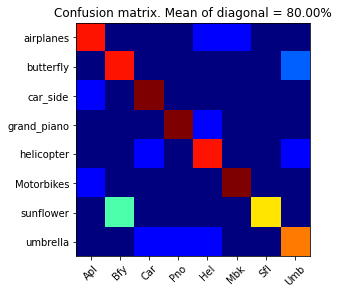

In [60]:
show_results(train_image_paths, test_image_paths, train_labels, test_labels, categories, abbr_categories,
             predicted_categories)

### SVM in TF-IDF setup

In [71]:
train_image_feats = bfc.get_bags_of_sifts(train_image_paths, vocab_filename,True)
test_image_feats = bfc.get_bags_of_sifts(test_image_paths, vocab_filename,True)

#### lambda=50

In [86]:
print('Using SVM classifier to predict test set categories')
predicted_categories = bfc.svm_classify(train_image_feats, train_labels, test_image_feats)

Using SVM classifier to predict test set categories


/home/anirban/anaconda3/envs/condapy36/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


###  Build a confusion matrix and score the recognition system

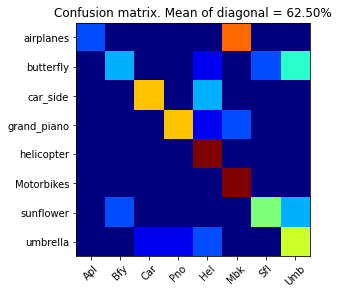

In [87]:
show_results(train_image_paths, test_image_paths, train_labels, test_labels, categories, abbr_categories,
             predicted_categories)

#### lambda=70

In [90]:
print('Using SVM classifier to predict test set categories')
predicted_categories = bfc.svm_classify(train_image_feats, train_labels, test_image_feats)

Using SVM classifier to predict test set categories


/home/anirban/anaconda3/envs/condapy36/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


###  Build a confusion matrix and score the recognition system

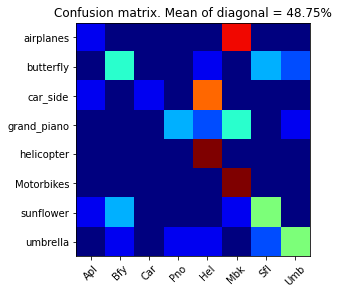

In [91]:
show_results(train_image_paths, test_image_paths, train_labels, test_labels, categories, abbr_categories,
             predicted_categories)

#### lambda=96

In [74]:
print('Using SVM classifier to predict test set categories')
predicted_categories = bfc.svm_classify(train_image_feats, train_labels, test_image_feats)


Using SVM classifier to predict test set categories


/home/anirban/anaconda3/envs/condapy36/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


###  Build a confusion matrix and score the recognition system

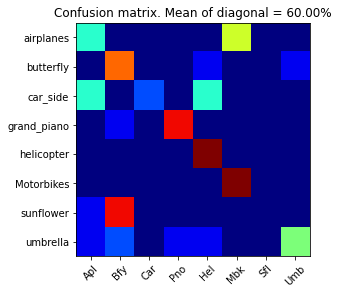

In [75]:
show_results(train_image_paths, test_image_paths, train_labels, test_labels, categories, abbr_categories,
             predicted_categories)